In [1]:
import sys
from pathlib import Path
sys.path.append('../bitome-kb/')
from bitome.core import Bitome
from Bio.SeqFeature import FeatureLocation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log,exp,inf
#bitome = Bitome.init_from_file('../bitome-kb/bitome.pkl')
bitome = Bitome(Path('../bitome-kb/data', 'NC_000913.3.gb'))
bitome.load_data(regulon_db=True)
from feature_functions import *
from pymodulon.io import load_json_model
from pymodulon.visualization import *

/mnt/d/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b0064
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/mnt/d/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b0142
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/mnt/d/IM-ML/workflow/../bitome-kb/bitome/genbank.py:328: UserWarning: No GEM-PRO file found for b4586
  warn(f'No GEM-PRO file found for {locus_tag}')
/mnt/d/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b0292
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/mnt/d/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b0349
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus

/mnt/d/IM-ML/workflow/../bitome-kb/bitome/genbank.py:328: UserWarning: No GEM-PRO file found for b4613
  warn(f'No GEM-PRO file found for {locus_tag}')
/mnt/d/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b3701
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/mnt/d/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b3732
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/mnt/d/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b3830
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/mnt/d/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b3889
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus

ModuleNotFoundError: No module named 'pymodulon.visualization'

# 1.1 Generate PSSMs for -10/-35 boxes for Sigma70/32/38/24/28/54 (Added 19)

Sigma19 Data: https://www.semanticscholar.org/paper/Analysis-of-the-Ferric-Citrate-Transport-Gene-of-Gtaaggaaaa-Aattc/7d1e6f586a98d53d8a7dc998197f3a6c32f68414

In [3]:
# [MODIFIED] Added sigma19
prib_sig = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[], 'Sigma19':[]}
m35_sig = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[], 'Sigma19':[]}

from Bio.SeqFeature import FeatureLocation
for p in bitome.promoters:
    if p.sigma_factors == ['Sigma19']:
        p.box_10_location = FeatureLocation(4516735, 4516741, -1)
        p.box_35_location = FeatureLocation(4516756, 4516762, -1)
        
for p in bitome.promoters:
    for k in prib_sig.keys():
        if p.sigma_factors == [k]:
            if p.box_10_location != None:
                prib_sig[k].append(p)
            if p.box_35_location != None:
                m35_sig[k].append(p)
                
M_prib = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[], 'Sigma19':[]}
M_m35 = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[], 'Sigma19':[]}
for k in M_prib.keys():
    if k == 'Sigma70':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma32':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
    elif k == 'Sigma38':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(11)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma24':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
    elif k == 'Sigma28':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(8)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma54':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(5)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma19':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
        
for k in M_prib.keys():
    for p in prib_sig[k]:
        if int(p.box_10_location.strand) == -1:
            s = complement(revstrand( str(bitome.sequence)[ int(p.box_10_location.start):int(p.box_10_location.end)] ))
        else:
            s = str(bitome.sequence)[ int(p.box_10_location.start):int(p.box_10_location.end)]
           
        if len(s) != len(M_prib[k]):
            continue
            
        for i in range(len(s)):
            M_prib[k][i][s[i]] = M_prib[k][i][s[i]] + 1
        
        if int(p.box_35_location.strand) == -1:
            s2 = complement(revstrand( str(bitome.sequence)[ int(p.box_35_location.start):int(p.box_35_location.end)] ))
        else:
            s2 = str(bitome.sequence)[ int(p.box_35_location.start):int(p.box_35_location.end)]
            
        if len(s2) != len(M_m35[k]):
            continue
            
        for i in range(len(s2)):
            M_m35[k][i][s2[i]] = M_m35[k][i][s2[i]] + 1          
            
for k in M_prib.keys():
    for i in range(len(M_prib[k])):
        SUM = M_prib[k][i]['A']+M_prib[k][i]['C']+M_prib[k][i]['G']+M_prib[k][i]['T']+4 # avoid log(0)
        for nu in ['A','C','G','T']:
            M_prib[k][i][nu] = log( (M_prib[k][i][nu]+1)/ SUM )
                    
for k in M_m35.keys():
    for i in range(len(M_m35[k])):
        SUM = M_m35[k][i]['A']+M_m35[k][i]['C']+M_m35[k][i]['G']+M_m35[k][i]['T'] + 4
        for nu in ['A','C','G','T']:
            M_m35[k][i][nu] = log( (M_m35[k][i][nu]+1)/ SUM )
            
M_prib['Sigma38'] = M_prib['Sigma38'][4:11]
m10_seq = { 'Sigma70':'TATAAT','Sigma38':'CTATACT','Sigma32':'CCCCAT','Sigma24':'TGTCAAA','Sigma28':'GCCGATAA','Sigma54':'TGCAT','Sigma19':'TGTCCT'}
m35_seq = { 'Sigma70':'TTGACA','Sigma38':'TTGACA','Sigma32':'CTTGAAA','Sigma24':'TGAACTT','Sigma28':'CTAAAG','Sigma54':'TGGCAC', 'Sigma19':'GAAAAT'}

In [5]:
sigma_pssm

{'M_prib': {'Sigma70': [{'A': -3.4028626609812167,
    'C': -2.787677021890983,
    'G': -2.3267232281651653,
    'T': -0.21375899444668606},
   {'A': -0.017343092038291,
    'C': -5.417765681523481,
    'G': -5.2999826458670976,
    'T': -4.858149893588059},
   {'A': -1.1463215064885777,
    'C': -2.1693310544137363,
    'G': -2.44735121595378,
    'T': -0.731015508542967},
   {'A': -0.6706619996467235,
    'C': -2.2397118511755356,
    'G': -2.029147082068186,
    'T': -1.3835250433710862},
   {'A': -0.7093622408937378,
    'C': -1.5082458063134538,
    'G': -2.033375418177707,
    'T': -1.8588525538695715},
   {'A': -2.315423672911232,
    'C': -3.759537604919949,
    'G': -4.096009841541162,
    'T': -0.14926340005463018}],
  'Sigma32': [{'A': -1.6704981691953467,
    'C': -0.2478361639045812,
    'G': -4.050044303325521,
    'T': -4.273187854639731},
   {'A': -2.2582848340974655,
    'C': -0.9320943970472806,
    'G': -0.8636916701628801,
    'T': -2.5239879998304713},
   {'A': -2

# 2. Save Sigma Factor PSSMs

In [4]:
sigma_pssm = {}
sigma_pssm['M_prib'] = M_prib
sigma_pssm['M_m35'] = M_m35
sigma_pssm['m10_seq'] = m10_seq
sigma_pssm['m35_seq'] = m35_seq
# save sigma factor PSSM
import pickle 
file = open("../data/sigma_pssm_ecoli.txt", "wb")
pickle.dump( sigma_pssm , file) 
file.close()

# 3. Load Sigma Factor PSSMs

In [45]:
import pickle
# reading the data from the file 
with open('../data/sigma_pssm_ecoli.txt', 'rb') as handle: 
    data = handle.read()  
# reconstructing the data as dictionary 
d = pickle.loads(data)
M_prib = d['M_prib']
M_m35 = d['M_m35']
m10_seq = d['m10_seq']
m35_seq = d['m35_seq']

# 4. Compute Sigma Factor related features and LDA transformation

In [46]:
sigmas = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None:
            continue
            
        data={}   
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name  
        data.update( {'Sigma70':0,'Sigma32':0,'Sigma38':0,'Sigma24':0,'Sigma28':0,
                      'Sigma54':0, 'Sigma19':0,'unknown':0} )
        
        if tu.promoter.sigma_factors == ['unknown'] or tu.promoter.sigma_factors == []:
            data['unknown'] = 1
        else:
            for sig in tu.promoter.sigma_factors:
                data[sig] = 1
            
        sigmas.append(data)
        
sigmas_table = pd.DataFrame(sigmas)
sigmas_table.head()

,ID,gene,TU,Sigma70,Sigma32,Sigma38,Sigma24,Sigma28,Sigma54,Sigma19,unknown
0,b0001,thrL,thrLABC,1,0,0,0,0,0,0,0
1,b0001,thrL,thrL,1,0,0,0,0,0,0,0
2,b0002,thrA,thrLABC,1,0,0,0,0,0,0,0
3,b0003,thrB,thrLABC,1,0,0,0,0,0,0,0
4,b0004,thrC,thrLABC,1,0,0,0,0,0,0,0


In [47]:
sigma_feature = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None:
            continue
            
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        data['strand'] = int(tu.location.strand)
        data['TU_length'] = len(tu.sequence)
        
        # replication strand
        data['leading'] = 0
        data['lagging'] = 0
        data['terminus'] = 0
        data[ str(g.replication_strand) ] = 1
        
        #sigmulon features ( sigma 38 excluded )
        for signame in m10_seq.keys():
            result = bitome.score_pribnow_m35( tu, signame, M_prib, M_m35,m10_seq,m35_seq)
            result.pop(signame+'_Matched_Prib')
            result.pop(signame+'_Matched_m35')
            data.update( result )
            
        sigma_feature.append(data)
        
sigma_pd = pd.DataFrame(sigma_feature)

In [48]:
X = {}
labels = {}
w = {}
for signame in m10_seq.keys():
    temp = sigma_pd[[signame + '_Prib_Start', signame + '_Prib_score',
       signame + '_Prib_hmd', signame + '_Prib_Tm', signame + '_m35_Start',
       signame + '_m35_score', signame +'_m35_hmd', signame +'_Spacer_Length',
       signame +'_Spacer_AT_ratio', signame + '_hepta_ratio']]
    X[signame] = temp.iloc[:,:].values
    labels[signame] = np.array(sigmas_table[signame])
    w[signame] = ld( X[signame], labels[signame])

In [49]:
X_ld = {}
for signame in m10_seq.keys():
    X_ld_temp = []
    X_temp = X[signame]
    labels_temp = labels[signame]
    w_temp = w[signame]
    
    for v in X_temp:
        X_ld_temp.append(  np.matmul( w_temp , v)  )
    X_ld[signame] = X_ld_temp

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argumen

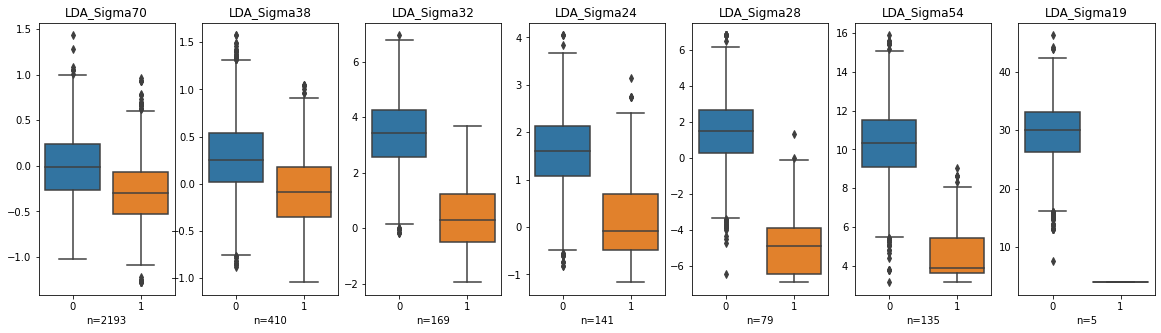

In [53]:
fig, axs = plt.subplots(1,7,figsize= (20,5))
sig_list = list(m10_seq.keys())
for i in range(7):
    signame = sig_list[i]
    sns.boxplot( labels[signame],X_ld[signame], ax = axs[i])
    axs[i].set_title('LDA_'+signame)
    axs[i].set_xlabel('n='+ str(sum(labels[signame])) )

In [54]:
print("Projection planes:")
print(w)

Projection planes:
{'Sigma70': array([ 1.65064382e-02, -6.59506008e-02,  3.02672899e-01, -5.24886433e-02,
        1.71139291e-02, -5.81206469e-02,  1.50473443e-01, -6.07490918e-04,
       -6.33659058e-01,  1.83387202e-01]), 'Sigma38': array([-0.01371682, -0.20837012, -0.01447272, -0.08668739, -0.01633375,
        0.06734916, -0.07138144,  0.00261692, -0.543808  ,  0.58861234]), 'Sigma32': array([ 0.04611459, -0.27112878,  0.78284334, -0.03343359,  0.03332323,
       -0.13342375,  0.0499618 ,  0.01279136,  0.89601573, -1.3806742 ]), 'Sigma24': array([ 0.00797833, -0.11419877,  0.09339727, -0.06414143,  0.03343402,
       -0.16363185,  0.25952174, -0.02545569, -0.45804491,  0.98356359]), 'Sigma28': array([-0.03337679, -0.44776207,  0.83001936, -0.14254413,  0.0937775 ,
        0.02082157,  0.9029926 , -0.12715429, -5.67666246,  2.79836743]), 'Sigma54': array([ 0.00849921, -0.29833907,  0.19381744, -0.14867898, -0.1209861 ,
       -0.55674056,  0.08177916,  0.1294853 ,  2.10054191, -1.991